In [2]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline



In [ ]:
data = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180630.txt')

In [5]:
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,00:00:00,REGULAR,6667150,2259901
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196690 entries, 0 to 196689
Data columns (total 11 columns):
C/A                                                                     196690 non-null object
UNIT                                                                    196690 non-null object
SCP                                                                     196690 non-null object
STATION                                                                 196690 non-null object
LINENAME                                                                196690 non-null object
DIVISION                                                                196690 non-null object
DATE                                                                    196690 non-null object
TIME                                                                    196690 non-null object
DESC                                                                    196690 non-null object
ENTRIES                           

In [7]:
data['date_time'] = data['DATE']+' '+data['TIME']
data['date_time'] = pd.to_datetime(data['date_time'])

In [8]:
data.index = data['date_time']
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date_time
date_time,,,,,,,,,,,,
2018-06-23 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,00:00:00,REGULAR,6667150,2259901,2018-06-23 00:00:00
2018-06-23 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909,2018-06-23 04:00:00
2018-06-23 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938,2018-06-23 08:00:00
2018-06-23 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006,2018-06-23 12:00:00
2018-06-23 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066,2018-06-23 16:00:00


#3: Time Intervals

In [79]:
data[(data['DESC']=='REGULAR')].date_time.value_counts().head()

2018-06-26 16:00:00    2442
2018-06-25 00:00:00    2442
2018-06-24 08:00:00    2441
2018-06-24 00:00:00    2441
2018-06-23 16:00:00    2441
Name: date_time, dtype: int64

the data description was inaccurate. most of the data is collected every 4 hours on the hour, but there are plenty of outliers. Now, we're investigating the day frequency.

In [80]:
data[(data['DESC']=='REGULAR')].DATE.value_counts()

06/25/2018    28099
06/23/2018    28072
06/26/2018    28055
06/24/2018    28037
06/27/2018    27994
06/28/2018    27972
06/29/2018    27876
Name: DATE, dtype: int64

Identifying unique turnstiles:

In [9]:
data['turnstile_id'] = data['STATION']+'_'+data['C/A']+'_'+data['UNIT']+'_'+data['SCP']

In [82]:
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date_time,turnstile_id
date_time,,,,,,,,,,,,,
2018-06-23 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,00:00:00,REGULAR,6667150,2259901,2018-06-23 00:00:00,59 ST_A002_R051_02-00-00
2018-06-23 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,04:00:00,REGULAR,6667173,2259909,2018-06-23 04:00:00,59 ST_A002_R051_02-00-00
2018-06-23 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,08:00:00,REGULAR,6667189,2259938,2018-06-23 08:00:00,59 ST_A002_R051_02-00-00
2018-06-23 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,12:00:00,REGULAR,6667305,2260006,2018-06-23 12:00:00,59 ST_A002_R051_02-00-00
2018-06-23 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2018,16:00:00,REGULAR,6667534,2260066,2018-06-23 16:00:00,59 ST_A002_R051_02-00-00


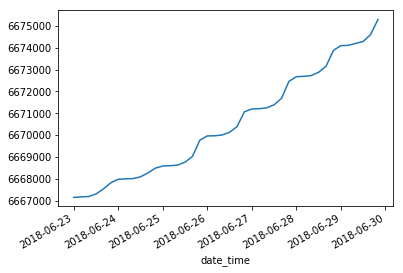

In [87]:
data[(data['turnstile_id']=='59 ST_A002_R051_02-00-00')].ENTRIES.plot.line()

we see from this plot that turnstile entry/exit data is cumulative over all time.

In [14]:
def difference(srs):
    return srs.max() - srs.min()

In [11]:
df_daily = data.groupby(by=['turnstile_id', 'DATE']).agg(difference)

In [12]:
df_daily.head()

ENTRIES  \
turnstile_id            DATE                  
1 AV_H007_R248_00-00-00 06/23/2018     2132   
                        06/24/2018     2393   
                        06/25/2018     3266   
                        06/26/2018     3467   
                        06/27/2018     3538   

                                    EXITS                                                                 \
turnstile_id            DATE                                                                               
1 AV_H007_R248_00-00-00 06/23/2018                                               3721                      
                        06/24/2018                                               2991                      
                        06/25/2018                                               3709                      
                        06/26/2018                                               3813                      
                        06/27/2018                                               3671                      

                                   date_time  
turnstile_id            DATE                  
1 AV_H007_R248_00-00-00 06/23/2018  20:00:00  
                        06/24/2018  20:00:00  
                        06/25/2018  20:00:00  
                        06/26/2018  20:00:00  
                        06/27/2018  20:00:00

In [30]:
by_station =  data.groupby(by=['STATION','turnstile_id', 'DATE']).agg(difference)

In [34]:
daily_totals = by_station.groupby(by=['STATION','DATE']).sum()

In [46]:

daily_totals.reset_index(inplace=True)


ValueError: cannot insert level_0, already exists

In [47]:
daily_totals["DATE"] = pd.to_datetime(daily_totals["DATE"])
print(daily_totals)

      level_0  index          STATION       DATE  ENTRIES  \
0           0      0             1 AV 2018-06-23    13603   
1           1      1             1 AV 2018-06-24    13664   
2           2      2             1 AV 2018-06-25    16913   
3           3      3             1 AV 2018-06-26    17616   
4           4      4             1 AV 2018-06-27    17258   
5           5      5             1 AV 2018-06-28    17511   
6           6      6             1 AV 2018-06-29    17774   
7           7      7           103 ST 2018-06-23    16652   
8           8      8           103 ST 2018-06-24    15765   
9           9      9           103 ST 2018-06-25    30342   
10         10     10           103 ST 2018-06-26    31569   
11         11     11           103 ST 2018-06-27    30260   
12         12     12           103 ST 2018-06-28    26463   
13         13     13           103 ST 2018-06-29    18072   
14         14     14    103 ST-CORONA 2018-06-23    10242   
15         15     15    

(array([736868., 736869., 736870., 736871., 736872., 736873., 736874.]),
 <a list of 7 Text xticklabel objects>)

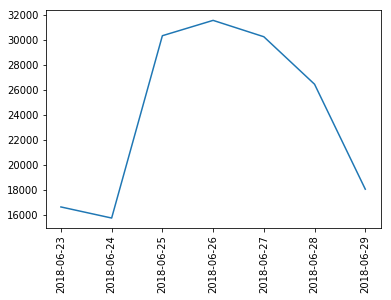

In [48]:
import matplotlib.pyplot as plt
daily_onestation = daily_totals[daily_totals["STATION"]=='103 ST']
plt.plot(daily_onestation["DATE"], daily_onestation["ENTRIES"] )
plt.xticks(rotation = 'vertical')

### Looking at data from one sattion over one week (103 St). We find traffic is relatively low on weekends and higher on weekdays